This example Python script let you access the Granta MI session on our internal virtual machine. You can extract or upload data into the MI databases and perform some data analysis.

In [5]:
# Import libraries
from GRANTA_MIScriptingToolkit import granta as mpy
import GRANTA_MIScriptingToolkit as gdl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd

In [6]:
session = gdl.GRANTA_MISession('http://azewacadmi1v1.win.ansys.com/mi_servicelayer/', autoLogon=True)
browseService = session.browseService
databases = browseService.GetDatabases().databases

print("Found {0} databases on the Granta MI Server".format(len(databases)))
for d in databases:
    print("Database key: {0.DBKey}, Database name: {0.name}".format(d))

Found 18 databases on the Granta MI Server
Database key: MI_ASM_Medical_Materials_1.54.3_2022_R1, Database name: ASM Medical Materials
Database key: MI_BiCrystalProject, Database name: Multiscale materials properties
Database key: AM_Material_Process_Data, Database name: AM_Material_Process_Data
Database key: MU_Sandbox_Energy_systems, Database name: Sustainability
Database key: MI_JAHM_1.3.3m_2021_R2, Database name: JAHM Curve Data
Database key: Lvl3_BuildingEnvironment, Database name: Lvl 3 - Built Environment
Database key: MI_Restricted_Substances, Database name: Restricted Substances
Database key: MI_Asphalt, Database name: MI Asphalt Database
Database key: HighTemperatureSuperconductors_SynthesisCharacterization, Database name: HighTemperatureSuperconductors_SynthesisCharacterization
Database key: MI_RefPapers, Database name: Academic Resources Database
Database key: MI_Template_Additive_Manufacturing, Database name: Additive Manufacturing Template
Database key: MI_ProductDesign, 

In [7]:
df = pd.DataFrame({'DBKey': [db.DBKey for db in databases],
                  'DBName': [db.name for db in databases]})
df

,DBKey,DBName
0,MI_ASM_Medical_Materials_1.54.3_2022_R1,ASM Medical Materials
1,MI_BiCrystalProject,Multiscale materials properties
2,AM_Material_Process_Data,AM_Material_Process_Data
3,MU_Sandbox_Energy_systems,Sustainability
4,MI_JAHM_1.3.3m_2021_R2,JAHM Curve Data
5,Lvl3_BuildingEnvironment,Lvl 3 - Built Environment
6,MI_Restricted_Substances,Restricted Substances
7,MI_Asphalt,MI Asphalt Database
8,HighTemperatureSuperconductors_SynthesisCharac...,HighTemperatureSuperconductors_SynthesisCharac...
9,MI_RefPapers,Academic Resources Database


In [8]:
# Get Tables from Ref Papers DB
dbKey = "MI_RefPapers"
tables = browseService.GetTables(gdl.GetTables(DBKey=dbKey)).tableDetails

print("Found {0} tables in database {1}".format(len(tables), dbKey))
for t in tables:
    print("Table name: {0}".format(t.tableReference.name))

Found 12 tables in database MI_RefPapers
Table name: Granta Reference Papers
Table name: Ansys Reference Papers
Table name: Other Literature
Table name: All Resources
Table name: Authors / Professors / Researchers / Employees
Table name: Student Teams
Table name: Universities / Institutions / Laboratories / Companies
Table name: Countries
Table name: Societies and Communities
Table name: Events, Conferences, Workshops, Symposia
Table name: Collaboration, Sponsoring, (C)R&D Projects...
Table name: Products, Softwares


In [9]:
# Get data from Granta ref papers table
table = 'Granta Reference Papers'
attribute = "Year of Publication"

tableRef = gdl.PartialTableReference(tableName=table)
attrRef = gdl.AttributeReference(name=attribute, DBKey=dbKey, partialTableReference=tableRef)
searchCriterion = gdl.RecordSearchCriterion(searchAttribute=attrRef, existsSearchValue=gdl.ExistsSearchValue())
request = gdl.CriteriaSearch(DBKey=dbKey, searchCriteria=[searchCriterion])

searchResults = session.searchService.CriteriaSearch(request).searchResults

df2 = pd.DataFrame({'ShortName': [r.shortName for r in searchResults],
                     'LongName': [r.longName  for r in searchResults]})
df2

,ShortName,LongName
0,1994_D. Cebon_Measu_Mater,1994_D. Cebon_Measurement Science _Materials s...
1,1999_P.M. Weaver_12th _Compu,1999_P.M. Weaver_12th International C_Computer...
2,2001_H.R. Shercliff_Progr_Selec,2001_H.R. Shercliff_Progress in Material_Selec...
3,2001_V.V. Tsukruk_Tribo_Nanoc,2001_V.V. Tsukruk_Tribology Letters_Nanocompos...
4,2003_J.S. Cooper_The I_Speci,2003_J.S. Cooper_The International Jo_Specifyi...
...,...,...
886,2022_Shoji_BendableConcrete,2022_Shoji_BendableConcrete
887,2022_Cornelio_SurgicalMasks,2022_Cornelio_SurgicalMasks
888,2022_Li_Cutter–Woodchip,2022_Li_Cutter–Woodchip
889,2015_Yin_MaterialsDatabase,2015_Yin_MaterialsDatabase


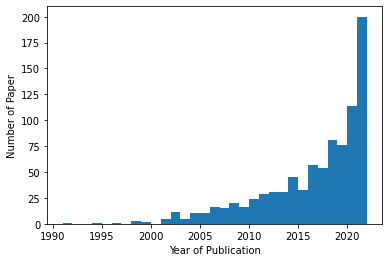

In [10]:
# Year analysis
attribute = "Year of Publication"
attributeLim = "Principal Granta Product used"

attributesInt = ["Year of Publication"]
attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributesInt]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)
recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

# Export data in a table
s_year = [None]*len(df2)
for attributeInt in attributesInt:
    for idx, record in enumerate(recordData):
        attrValueInt = next((x for x in record.attributeValues if x.attributeName == attributeInt), None)
        s_year[idx] = attrValueInt.integerDataValue.value.real if attrValueInt else None
    df2[attributeInt] = s_year
df2

#Plot
figure=plt.figure(1)
plt.hist(s_year, bins=max(s_year)-min(s_year))
plt.xlabel('Year of Publication')
plt.ylabel('Number of Paper')
plt.savefig("Paper_Year"+".png", bbox_inches='tight')

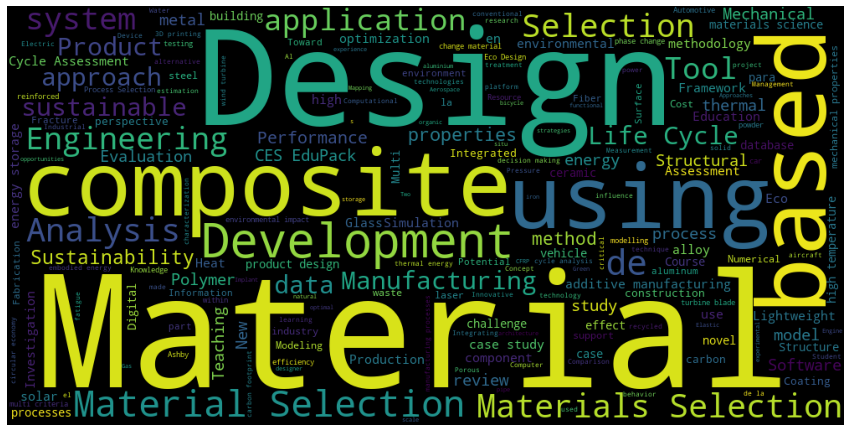

In [15]:
# Title analysis

# Get data from the DB
attributesTxt = ["Title"]
attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributesTxt]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)
recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

# Export data in a table
s_title = [None]*len(df2)
for attributeTxt in attributesTxt:
    for idx, record in enumerate(recordData):
        attrValueTxt = next((x for x in record.attributeValues if x.attributeName == attributeTxt), None)
        s_title[idx] = attrValueTxt.longTextDataType.value if attrValueTxt else None
    df2[attributeTxt] = s_title
df2

# Wordcloud plot
# https://amueller.github.io/word_cloud/index.html
unique_string=(" ").join(s_title)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("WordCloud_Title"+".png", bbox_inches='tight')
plt.show()
plt.close()